Network Analysis Metrics:
                 Node  Degree Centrality  Betweenness  Closeness
0              price                0.8     0.533333   0.800000
1               area                0.2     0.000000   0.457143
2           bedrooms                0.3     0.000000   0.492308
3          bathrooms                0.3     0.000000   0.492308
4            stories                0.3     0.000000   0.492308
5    airconditioning                0.1     0.000000   0.426667
6            parking                0.2     0.000000   0.457143
7           prefarea                0.1     0.000000   0.426667
8   furnishingstatus                0.1     0.000000   0.426667
9          guestroom                0.1     0.000000   0.100000
10          basement                0.1     0.000000   0.100000


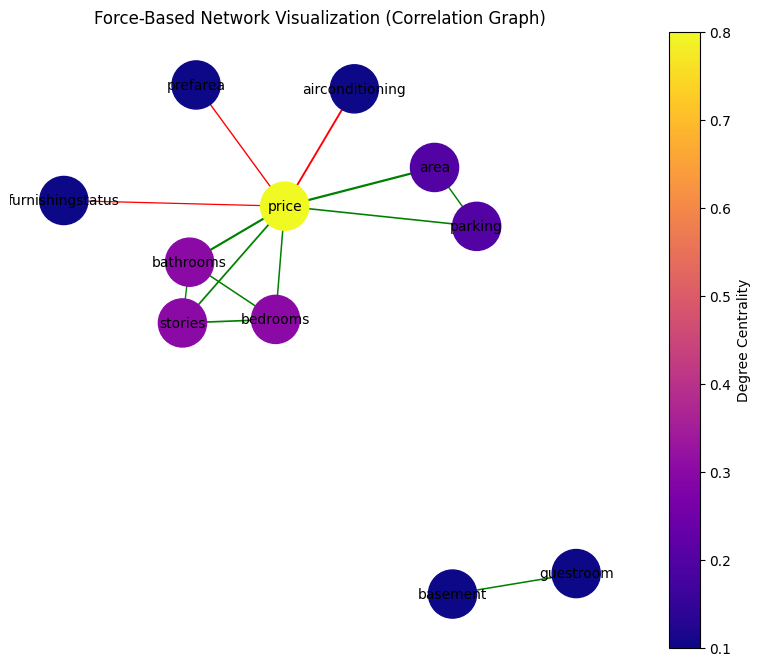

Node and edge data exported for Tableau visualization.


In [ ]:
Wimport pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

data = pd.read_csv("Housing.csv")

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.factorize(data[col])[0]

num = data.select_dtypes(include=['int64', 'float64']).dropna()
corr = num.corr()

G = nx.Graph()
threshold = 0.3

for i in corr.columns:
    for j in corr.columns:
        if i != j and abs(corr.loc[i, j]) > threshold:
            color = 'green' if corr.loc[i, j] > 0 else 'red'
            G.add_edge(i, j, weight=abs(corr.loc[i, j]), color=color)

degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

metrics_df = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree Centrality': [degree_centrality[n] for n in G.nodes()],
    'Betweenness': [betweenness[n] for n in G.nodes()],
    'Closeness': [closeness[n] for n in G.nodes()]
})
print("Network Analysis Metrics:\n", metrics_df)

pos = nx.spring_layout(G, k=0.6, iterations=50)
node_colors = [degree_centrality[n] for n in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
edge_widths = [G[u][v]['weight'] * 3 for u, v in G.edges()]

plt.figure(figsize=(10,8))
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.plasma, node_size=1200)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.colorbar(nodes, label="Degree Centrality")
plt.title("Force-Based Network Visualization (Correlation Graph)")
plt.axis("off")
plt.show()

node_export = pd.DataFrame({'Node': list(G.nodes()), 'Centrality': node_colors})
edge_export = pd.DataFrame({
    'Source': [u for u, v in G.edges()],
    'Target': [v for u, v in G.edges()],
    'Weight': [G[u][v]['weight'] for u, v in G.edges()],
    'Color': [G[u][v]['color'] for u, v in G.edges()]
})

node_export.to_csv("nodes_for_tableau.csv", index=False)
edge_export.to_csv("edges_for_tableau.csv", index=False)
print("Node and edge data exported for Tableau visualization.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


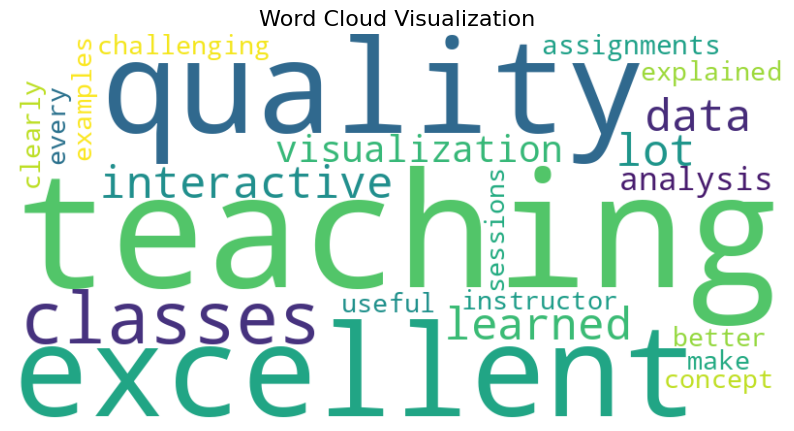

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


nltk.download('punkt')
nltk.download('stopwords')


# Preprocess text
tokens = word_tokenize(text.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]


# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))


# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization", fontsize=16)
plt.show()



